# I. Lý thuyết (10 câu, 0.5 điểm/câu)

1) Phát biểu nào sau đây là đúng về kiến trúc MLP

A. Là kiến trúc gồm nhiều Layers liên tiếp xử lý dữ liệu theo thứ tự.

B. Mỗi một layer của MLP sẽ bao gồm nhiều units, mỗi unit đóng vai trò tương tự như một biến.

C. Thứ tự các layers của MLP là `input layer --> các hidden layers --> output layer`

D. Cả ba đáp án trên.

D

2) Các đặc trưng được tạo ra từ MLP có gì khác biệt so với các thuật toán machine learning truyền thống ?

A. Là những đặc trưng được xác định từ trước thông qua feature engineering từ người xây dựng mô hình.

B. Là những đặc trưng được tạo thành từ Polynormial Feature.

C. Là những đặc trưng đã được chuẩn hóa theo Min-max scaling.

D. Là những đặc trưng ẩn (_latent features_) được học thông qua quá trình huấn luyện mô hình.

D

3) Vì sao khi tính toán một unit tại layer tiếp theo thì cần áp dụng activation function lên tổ hợp tuyến tính của các units đầu vào từ layer ngay liền trước?

A. Để giảm thiểu chi phí tính toán.

B. Để khắc phục hiện tượng overfitting.

C. Để biến đổi không gian features từ dạng tuyến tính sang dạng phi tuyến.

D. Để khắc phục hiện tượng underfitting.

C

4) Nếu mạng neural không áp dụng activation function thì điều gì sẽ xảy ra?

A. Các units tại các hidden layers chỉ là biểu diễn tuyến tính của các biến đầu vào.

B. Mô hình sẽ có chi phí tính toán cao.

C. Cần rất nhiều hidden layers để mô hình có độ chính xác cao.

D. Không thể huấn luyện được mô hình.

A

5) Quá trình Feed forward là gì ?

A. Tính toán loss function.

B. Tính toán đầu ra thông qua đầu vào và các kết nối của mạng.

C. Tính gradient descent.

D. Đếm số lượng tham số của mô hình.

B

6) Mục tiêu của quá trình Back propagation là gì ?

A. Tính output của mô hình.

B. Tính gradient descent tại từng layers.

C. Cập nhật trọng số của mô hình thông qua đạo hàm bậc nhất theo chiều ngược lại từ layer output trở về layer input.

D. Tính loss function.

C

7) Làm sao để kiểm soát hiện tượng overfitting trong một mạng MLP?

A. Thêm thành phần điều chuẩn là các norm chuẩn của trọng số vào loss function.

B. Sử dụng dropout để loại bỏ các kết nối của mạng neural một cách ngẫu nhiên.

C. Gia tăng số lượng layers.

D. A và B


D

8) Để tính được phân phối xác suất tại đầu ra của bài toán phân loại đa biến của mạng MLP thì chúng ta sẽ?

A. Sử dụng hàm softmax lên các units tại layers cuối cùng.

B. Sử dụng hàm ReLU lên các units tại layers cuối cùng.

C. Sử dụng hàm tanh lên các units tại layers cuối cùng.

D. chỉ cần tổ hợp tuyến tính các units lại layers trước layers cuối cùng.



A

9) Hàm loss function của mạng MLP có dạng như thế nào ?

A. Là tổng Cross Entropy của toàn bộ các quan sát.

B. Là tổng Cross Entropy của toàn bộ các nhãn.

C. Là tổng Cross Entropy của toàn bộ các quan sát và toàn bộ các nhãn.

D. A. Là tổng MSE của toàn bộ các quan sát.

C

10) Giả sử sau quá trình Back propagation tính được đạo hàm tại từng trọng số là $D_{ij}^{(l)}$ (là đạo hàm tương ứng với tham số $\Theta_{ij}^{(l)}$ kết nối unit thứ $i$ của layer $(l-1)$ với unit thứ $j$ của layer $l$). $\alpha$ là learning rate có giá trị dương và rất nhỏ. Trọng số sẽ được cập nhật như thế nào?

A. $\Theta_{ij}^{(l)} := \Theta_{ij}^{(l)} + \alpha D_{ij}^{(l)}$

B. $\Theta_{ij}^{(l)} := \Theta_{ij}^{(l)} - \alpha D_{ij}^{(l)}$

C. $\Theta_{ij}^{(l)} := \Theta_{ij}^{(l)} - \alpha ||D_{ij}^{(l)}||_1$

D. $\Theta_{ij}^{(l)} := \Theta_{ij}^{(l)} - \alpha ||D_{ij}^{(l)}||_2$

B

# II. Thực hành

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from google.colab import drive
import sys
import os
import utils

ModuleNotFoundError: ignored

# Read Dataset

Sử dụng bộ dữ liệu iris về các loài hoa.

In [2]:
from sklearn.datasets import load_iris
data = load_iris()

X = data['data']
y = data['target']
print(X.shape, y.shape)

(150, 4) (150,)


Hãy thiết kế một mạng MLP với `input layer (4 units) -->  hidden layer 1 (10 units) --> hidden layer 2 (10 units) --> output layer (3) unit` thông qua việc:


1) Xác định kích thước các ma trận trọng số $\Theta_1, \Theta_2, \Theta_3$ tại từng layers. Biết rằng tại các layer có xét đến unit bằng 1 cho _hệ số tự do (bias weight)_. Điền shape vào bên dưới:

In [ ]:
# Trả lời:
Theta_1.shape = 
Theta_2.shape = 
Theta_3.shape = 

2) Khởi tạo các ma trận trọng số ngẫu nhiên $\Theta_1$, $\Theta_2$, $\Theta_3$ tương ứng với các layers 1, 2, 3.

In [3]:
import numpy as np

W1 = np.random.uniform(-1, 1, (10, 5))
W2 = np.random.uniform(-1, 1, (10, 11))
W3 = np.random.uniform(-1, 1, (3, 11))
print(W1.shape, W2.shape, W3.shape)

(10, 5) (10, 11) (3, 11)


3) Viết các hàm chức năng gồm:
- activation function để biến đổi phi tuyến: Đầu vào là một véc tơ $\mathbf{z}$.
- dense function là hàm tính output tại mỗi layer: Đầu vào là vector $\mathbf{a}$ (véc tơ gồm các units layer liền trước) và ma trận trọng số $\mathbf{W}$ kết nối layer liền trước với layer hiện tại. Lưu ý: Cần áp dụng activation function để biến đổi phi tuyến.
- softmax function để tính phân phối xác suất: Đầu vào là một véc tơ $\mathbf{z}$ của các units tại layer cuối cùng.

In [4]:
def activation(z):
  sigmoid = 1/(1+np.exp(-z))
  return sigmoid

z = np.array([1, 1, 3, 2, 4])
activation(z)

array([0.73105858, 0.73105858, 0.95257413, 0.88079708, 0.98201379])

In [5]:
def dense(a, W):
  '''
  Compute output of layer l
  arguments:
    input:
      a: activation vector of layer (l-1)
      W: weight matrix to connect from layer (l-1) to layer l, having shape of (s_{l}, s_{l-1}+1)
    output:
      activation values of layer l
  '''
  z = W.dot(a)
  a = activation(z)
  return a

a = np.array([1, 1, 2, 3, 4])
dense(a, W1)

array([0.92428219, 0.99460872, 0.98149242, 0.20485064, 0.65279493,
       0.12409186, 0.92357114, 0.37376815, 0.66877561, 0.16962132])

In [13]:
def softmax(z):
  '''
  '''
  z_exp = np.exp(z-np.min(z))
  z_softmax = np.exp(z_exp)/np.sum(np.exp(z_exp))
  return z_softmax

z = np.array([1, 2, 2])
softmax(z)

array([0.08230532, 0.45884734, 0.45884734])

4) Viết hàm thực hiện quá trình feed forward để tính output cho mô hình từ một véc tơ đầu vào. 

In [15]:
# input --> dense --> dense --> output
def feed_forward(x):
  al = x
  for l, W in enumerate([W1, W2, W3]):
    al = np.concatenate((np.array([1]), al), axis = 0)
    al = dense(al, W)
  a_output = softmax(al)
  return a_output

x = np.array([1, 2, 3, 4])
p = feed_forward(x)
print(p)
print(np.sum(p))

[0.37738758 0.4634307  0.15918172]
0.9999999999999999


5) Huấn luyện mô hình trên bộ dữ liệu iris bằng keras theo kiến trúc đã xác định như trên với tỷ lệ phân chia tập train/validation là 80/20.

# Neural network initialize

In [16]:
# Khởi tạo kiến trúc
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

inpt = Input(shape = (4), name='input')
hidden_1 = Dense(10, name='hidden_1')(inpt)
act1 = Activation('relu', name='act_1')(hidden_1)
hidden_2 = Dense(10, name='hidden_2')(act1)
act2 = Activation('relu', name='act_2')(hidden_2)
hidden_3 = Dense(3, name='output')(act2)
output = Activation('softmax')(hidden_3)
model = Model(inputs = [inpt], outputs = [output])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 4)]               0         
                                                                 
 hidden_1 (Dense)            (None, 10)                50        
                                                                 
 act_1 (Activation)          (None, 10)                0         
                                                                 
 hidden_2 (Dense)            (None, 10)                110       
                                                                 
 act_2 (Activation)          (None, 10)                0         
                                                                 
 output (Dense)              (None, 3)                 33        
                                                                 
 activation (Activation)     (None, 3)                 0     

We can visualize model by `plot_model` function. It is going to show your each layer's name, and relative shape of input and output. Note: the shape is a tupple which has the first element `None` corresponding with un-predefined `batch_size` parameter.

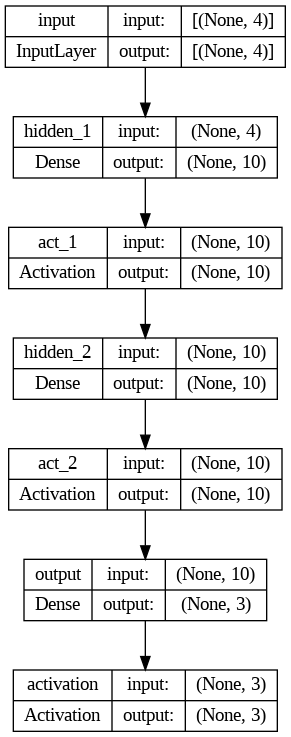

In [17]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Train your model

You have just completed to initialize your model architecture. In the next step, you have to compile the loss function and optimizer to your model.

* Optimizer: That is the strategy to update your gradient descent after each iteration of training strategy.

* Loss: The loss function that you use to train your model. In the classification task, it is usally [crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/sparse_categorical_crossentropy) and regression task, the loss function is [mean_square_error](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/mean_squared_error).

Beside you can log the metrics measured on validation dataset  after each training epoch through `metrics` parameter of `model.compile()` funciton.

In [18]:
# optimizer
opt = Adam()
# compile optimizer, loss, metrics
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## If you have train and validation dataset

After you initialize optimizer, loss function and metrics, you can train your model by `fit()` function in that syntax:
```
model.fit(X_train, y_train,
          validation_data = (X_val, y_val),
          epochs = 100,
          batch_size = 32)
```

In which: 

* `X_train, y_train`: are input and target datasets you use to train your model in relative.
* `validation_data = (X_val, y_val)`: the validation dataset you used to measure the compiled metric after each epoch.
* `epochs`: Number of time you repeat train you dataset.
* `batch_size`: The size of your each mini-batch you fit into your model. Note that `number of iterations` in each epoch = `total train samples/batch_size`.

## If you only have total dataset and randomly split into train/validation.

In [19]:
# Train your model
model.fit(X, y, 
          validation_split = 0.2,
          epochs = 100,
          batch_size = 32)

Epoch 1/100
4/4 [==============================] - 1s 95ms/step - loss: 1.6145 - accuracy: 0.1667 - val_loss: 0.6263 - val_accuracy: 1.0000
Epoch 2/100
4/4 [==============================] - 0s 25ms/step - loss: 1.5436 - accuracy: 0.1667 - val_loss: 0.6638 - val_accuracy: 1.0000
Epoch 3/100
4/4 [==============================] - 0s 27ms/step - loss: 1.4741 - accuracy: 0.1667 - val_loss: 0.6937 - val_accuracy: 1.0000
Epoch 4/100
4/4 [==============================] - 0s 21ms/step - loss: 1.4152 - accuracy: 0.1667 - val_loss: 0.7168 - val_accuracy: 1.0000
Epoch 5/100
4/4 [==============================] - 0s 24ms/step - loss: 1.3596 - accuracy: 0.1667 - val_loss: 0.7355 - val_accuracy: 1.0000
Epoch 6/100
4/4 [==============================] - 0s 21ms/step - loss: 1.3147 - accuracy: 0.1667 - val_loss: 0.7517 - val_accuracy: 1.0000
Epoch 7/100
4/4 [==============================] - 0s 22ms/step - loss: 1.2793 - accuracy: 0.1667 - val_loss: 0.7658 - val_accuracy: 1.0000
Epoch 8/100
4/4 [===

# Hyperparameters tuning



## Keras tuner

The Keras Tuner is a library that helps you pick the optimal set of hyperparameters for your TensorFlow program. The process of selecting the right set of hyperparameters for your machine learning (ML) application is called hyperparameter tuning or hypertuning.

Hyperparameters are the variables that govern the training process and the topology of an ML model. These variables remain constant over the training process and directly impact the performance of your ML program. Hyperparameters are of two types:

* **Model hyperparameters** which influence model selection such as the number and width of hidden layers
* **Algorithm hyperparameters** which influence the speed and quality of the learning algorithm such as the learning rate for Stochastic Gradient Descent (SGD) and the number of nearest neighbors for a k Nearest Neighbors (KNN) classifier
In this tutorial, you will use the Keras Tuner to perform hypertuning for an image classification application.

In [ ]:
!pip install -q -U keras-tuner

In [ ]:
import keras_tuner as kt

In [ ]:
def model_builder(hp):
  inpt = Input(shape = (108), name='input')
  # Choose an optimal value between 32-512
  hp_units1 = hp.Int('units1', min_value=32, max_value=512, step=32)
  hidden_1 = Dense(hp_units1, name='hidden_1')(inpt)
  act1 = Activation('relu', name='act_1')(hidden_1)
  # Choose an optimal value between 32-512
  hp_units2 = hp.Int('units2', min_value=32, max_value=512, step=32)
  hidden_2 = Dense(hp_units2, name='hidden_2')(act1)
  act2 = Activation('relu', name='act_2')(hidden_2)
  hidden_3 = Dense(2, name='output')(act2)
  output = Activation('softmax')(hidden_3)
  model = Model(inputs = [inpt], outputs = [output])
  model.summary()

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4])

  model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

Instantiate the tuner to perform the hypertuning. The Keras Tuner has four tuners available - `RandomSearch, Hyperband, BayesianOptimization, and Sklearn`. In this tutorial, you use the [Hyperband](https://arxiv.org/pdf/1603.06560.pdf) tuner.

To instantiate the Hyperband tuner, you must specify the hypermodel, the objective to optimize and the maximum number of epochs to train (max_epochs).

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='mlp_income_cls_kt_tuner',
                     project_name='intro_to_kt')

INFO:tensorflow:Reloading Oracle from existing project mlp_income_cls_kt_tuner/intro_to_kt/oracle.json


INFO:tensorflow:Reloading Oracle from existing project mlp_income_cls_kt_tuner/intro_to_kt/oracle.json


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 108)]             0         
                                                                 
 hidden_1 (Dense)            (None, 32)                3488      
                                                                 
 act_1 (Activation)          (None, 32)                0         
                                                                 
 hidden_2 (Dense)            (None, 32)                1056      
                                                                 
 act_2 (Activation)          (None, 32)                0         
                                                                 
 output (Dense)              (None, 2)                 66        
                                                                 
 activation_2 (Activation)   (None, 2)                 0   

INFO:tensorflow:Reloading Tuner from mlp_income_cls_kt_tuner/intro_to_kt/tuner0.json


In [ ]:
!ls mlp_income_cls_kt_tuner/

intro_to_kt


The Hyperband tuning algorithm uses adaptive resource allocation and early-stopping to quickly converge on a high-performing model. This is done using a sports championship style bracket. The algorithm trains a large number of models for a few epochs and carries forward only the top-performing half of models to the next round. Hyperband determines the number of models to train in a bracket by computing 1 + logfactor(max_epochs) and rounding it up to the nearest integer.

Create a callback to stop training early after reaching a certain value for the validation loss.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
stop_early = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(X_train.todense(), y_train.values,
             validation_data = (X_val.todense(), y_val.values),
             epochs=50,
             callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units1')}, the second densely-connected
layer is {best_hps.get('units2')}, and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 42 Complete [00h 00m 14s]
val_accuracy: 0.8209999799728394

Best val_accuracy So Far: 0.854200005531311
Total elapsed time: 00h 03m 01s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit



The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 480, the second densely-connected
layer is 32, and the optimal learning rate for the optimizer
is 0.001.



## Train the model

Find the optimal number of epochs to train the model with the hyperparameters obtained from the search.

In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train.todense(), y_train.values,
              validation_data = (X_val.todense(), y_val.values), 
              epochs=50)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 108)]             0         
                                                                 
 hidden_1 (Dense)            (None, 480)               52320     
                                                                 
 act_1 (Activation)          (None, 480)               0         
                                                                 
 hidden_2 (Dense)            (None, 32)                15392     
                                                                 
 act_2 (Activation)          (None, 32)                0         
                                                                 
 output (Dense)              (None, 2)                 66        
                                                                 
 activation_1 (Activation)   (None, 2)                 0   

Re-instantiate the hypermodel and train it with the optimal number of epochs from above.

In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_train.todense(), y_train.values,
              validation_data = (X_val.todense(), y_val.values),
              epochs=best_epoch)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 108)]             0         
                                                                 
 hidden_1 (Dense)            (None, 480)               52320     
                                                                 
 act_1 (Activation)          (None, 480)               0         
                                                                 
 hidden_2 (Dense)            (None, 32)                15392     
                                                                 
 act_2 (Activation)          (None, 32)                0         
                                                                 
 output (Dense)              (None, 2)                 66        
                                                                 
 activation_2 (Activation)   (None, 2)                 0   